In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns

from rakott.mpl import legend_out

## Cross-feeding

$$
\frac{d}{d t} N_{i}(t)=\left[\frac{r_{1, i} R_1(t)}{k_{1, i}+R_1(t)}+\frac{r_{2, i} R_2(t)}{k_{2, i}+R_2(t)}\right] N_{i}(t) \\\\
\frac{d}{d t} R_1(t)=-\sum_{i=1}^{2} \frac{1}{y_{1, i}} \frac{r_{1, i} R_1(t)}{k_{1, i}+R_1(t)} N_{i}(t) \\\\
\frac{d}{d t} R_2(t)=\sum_{i=1}^{2}\left[h_{i} \frac{r_{1, i} R_1(t)}{k_{1, i}+R_1(t)}-\frac{1}{y_{2, i}} \frac{r_{2, i} R_2(t)}{k_{2, i}+R_2(t)}\right] N_{i}(t)
$$

- $r_{1,i}$ and $r_{2,i}$ are the maximum growth rates of type $i$ on, say, glucose and acetate, respectively
- $k_{1,i}$ and $k_{2,i}$ are the resource concentrations that permit growth at half-maximum rate
- $y_{1,i}$ and $y_{2,i}$ are the population yields from each unit of glucose and acetate
- $h_i$ is the number of units of acetate produced for each unit increment of $N_i$.

In [4]:
def ribeck_ode(x, t, K, r, y, h):
    N1, N2, R1, R2 = x
    r11, r12, r21, r22 = r
    K11, K12, K21, K22 = K
    y11, y12, y21, y22 = y
    h1, h2 = h
    
    dN1dt = (
        N1 * r11 * R1 / (K11 + R1) + 
        N1 * r21 * R2 / (K21 + R2)
    )
    dN2dt = (
        N2 * r12 * R1 / (K12 + R1) + 
        N2 * r22 * R2 / (K22 + R2)
    )
    dR1dt = (
        -1/y11 * N1 * r11 * R1 / (K11 + R1) 
        -1/y12 * N2 * r12 * R1 / (K12 + R1)
    )
    dR2dt = (
        h1 * N1 * r11 * R1 / (K11 + R1) +
        h2 * N2 * r12 * R1 / (K12 + R1) 
        -1/y21 * N1 * r21 * R2 / (K21 + R2) 
        - 1/y22 * N2 * r22 * R2 / (K22 + R2)
    )
    
    return [dN1dt, dN2dt, dR1dt, dR2dt]

In [27]:
r11 = 1
r12 = 2.68
r21 = 7
r22 = 1
r = r11, r12, r21, r22
K11 = K12 = 50
K21 = K22 = 50 
K = K11, K12, K21, K22
y11 = y12 = 1
y21 = y22 = 1
y = y11, y12, y21, y22
h1 = h2 = 1
h = h1, h2
R1_0 = 1

x0 = 0.4, 0.6, R1_0, 0
t = np.linspace(0, 50, 100)

x = odeint(ribeck_ode, x0, t, args=(K, r, y, h))
N1, N2, R1, R2 = x.T

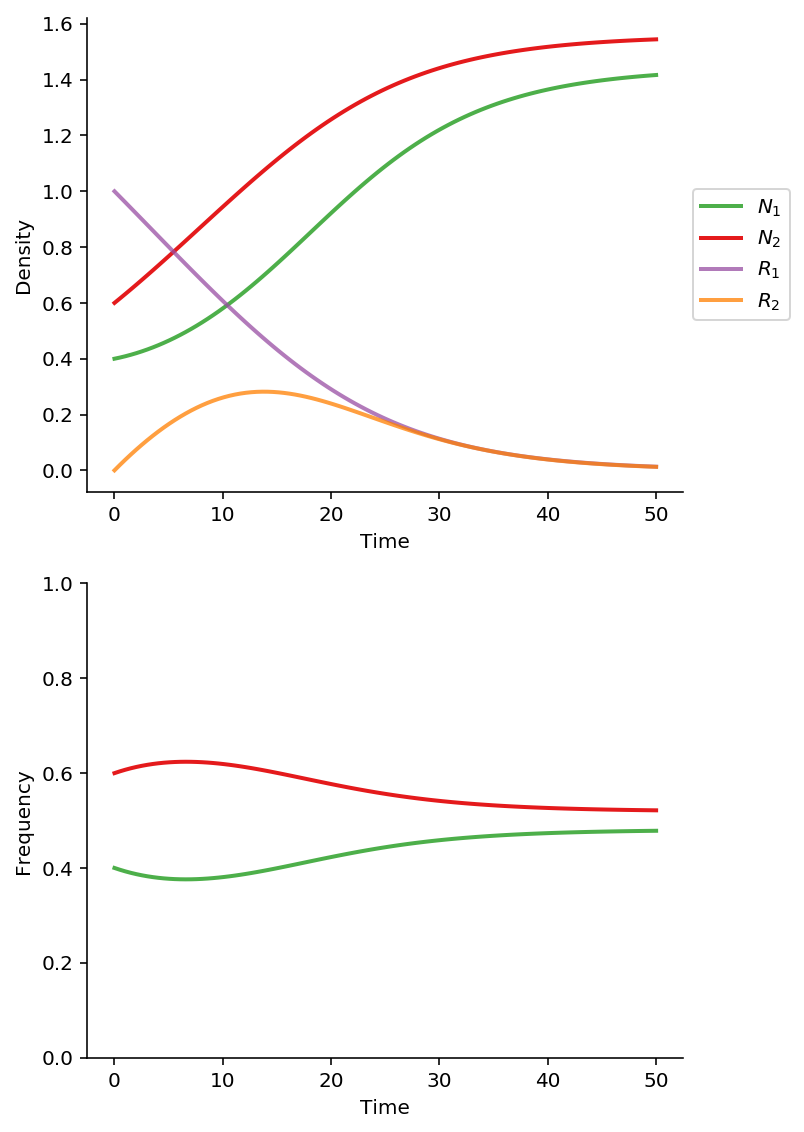

In [28]:
red, blue, green, purple, orange  = sns.color_palette('Set1', 5)
fig, axes = plt.subplots(2, 1, figsize=(5, 8))
ax = axes[0]
linekws = dict(lw=2)

ax.plot(t, N1, color=green, label='$N_1$', **linekws)
ax.plot(t, N2, color=red, label='$N_2$', **linekws)
# ax.plot(t, N1+N2, color=blue, label='$N_1+N_2$', **linekws)
ax.plot(t, R1, color=purple, label='$R_1$', alpha=0.75, **linekws)
ax.plot(t, R2, color=orange, label='$R_2$', alpha=0.75, **linekws)
ax.set(xlabel=('Time'), ylabel=('Density'))
legend_out(ax)

ax = axes[1]
ax.plot(t, N1/(N1+N2), color=green, label='$N_1$', **linekws)
ax.plot(t, N2/(N1+N2), color=red, label='$N_2$', **linekws)
ax.set(xlabel=('Time'), ylabel=('Frequency'), ylim=(0,1))

fig.tight_layout()
sns.despine()

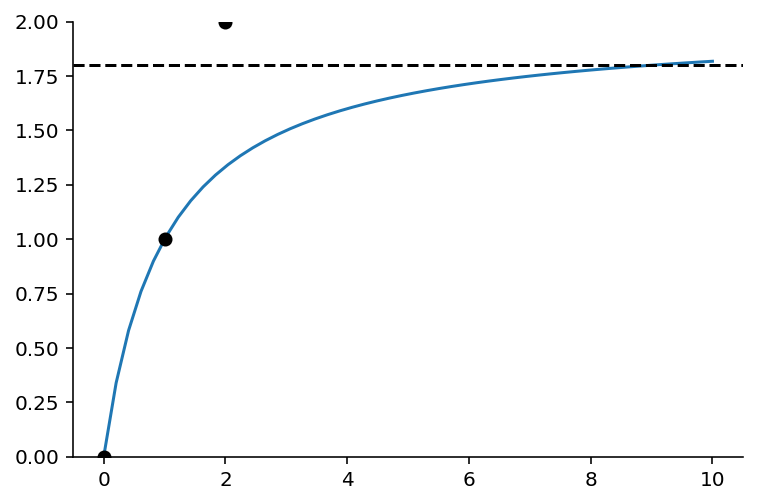

In [39]:
w = np.linspace(0, 10)
plt.plot(w, 2*w/(1+w))
plt.plot([0,1,2],[0,1,2], 'ok')
plt.ylim(0,2)
c = 0.1
plt.axhline(2*(1-c), ls='--', color='k')
sns.despine()